## Import Libraries

Include the libraries as required

In [1]:
import pandas as pd
import numpy as np

import zipfile

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats


## Data Inspection

Let's find out the individual feature information

In [2]:
zf = zipfile.ZipFile('hackerearth-machine-learning-exhibit-art.zip') 

shipping_data = pd.read_csv(zf.open('dataset/train.csv'))
shipping_data.head(10)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
5,fffe3300390039003900,Tracy Francis,0.99,46.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,NaN,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",-1922.78
6,fffe3800360033003700,David Hawes,0.64,17.0,9.0,7264.0,Brass,8.26,90.67,No,Yes,No,Roadways,No,Working Class,No,06/05/16,06/02/16,"South Matthew, WV 76033",-1536.66
7,fffe3800300039003800,David Osher,0.74,23.0,10.0,3287.0,Clay,12.81,13.25,Yes,No,No,Waterways,Yes,Wealthy,No,06/04/19,05/31/19,"Davidmouth, CA 37824",-422.42
8,fffe3800330032003900,Arnold Reel,0.00,6.0,4.0,108.0,Clay,3.98,19.76,Yes,No,No,Waterways,Yes,Working Class,Yes,08/27/18,08/23/18,"Lisaville, ND 43925",-160.10
9,fffe3800310031003800,James Comfort,0.12,23.0,9.0,195226.0,Marble,245.63,49.25,No,No,No,Roadways,No,Working Class,No,07/14/16,07/10/16,"Jacobland, WV 85997",-834.27


In [3]:
shipping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

- There are 6500 rows in the dataset with 20 features.
- The dataset consists of both quantitative and qualitative data.
- It seems to be there are null values in the dataset.

| Column Name             |        Column Description |
| ------------------------| --------------------------------------------------------------------|
| Customer Id             |        Represents the unique identification number of the customers |
| Artist Name             |        Represents the name of the artist |
| Artist Reputation       |        Represents the reputation of an artist in the market (the greater the reputation value,the higher the reputation of the artist in the market) |
| Height                  |        Represents the height of the sculpture |
| Width                   |        Represents the width of the sculpture |
| Weight                  |        Represents the  weight of the sculpture |
| Material                |        Represents the material that the sculpture is made of |
| Price Of Sculpture      |        Represents the price of the sculpture |
| Base Shipping Price     |        Represents the base price for shipping a sculpture |
| International           |        Represents whether the shipping is international |
| Express Shipment        |        Represents whether the shipping was in the express (fast) mode |
| Installation Included   |        Represents whether the order had installation included in the purchase of the sculpture |
| Transport               |        Represents the mode of transport of the order |
| Fragile                 |        Represents whether the order is fragile |
| Customer Information    |        Represents  details about a customer |
| Remote Location         |        Represents whether the customer resides in a remote location |
| Scheduled Date          |        Represents the date when the order was placed |
| Delivery Date           |        Represents the date of delivery of the order |
| Customer Location       |        Represents the location of the customer |
| Cost                    |        Represents the cost of the order |

#### Correct the data type of Data columns

In [4]:
# convert date object data type to datetime
shipping_data["Scheduled Date"] = pd.to_datetime(shipping_data["Scheduled Date"], \
                                                       errors = 'coerce')
shipping_data["Delivery Date"] = pd.to_datetime(shipping_data["Delivery Date"], \
                                                      errors = 'coerce')

- Now the data types are corrected. Let's clean the data.

#### Let's find out how many null values exist in each feature

In [5]:
shipping_data.isna().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

- Features like "Artist Reputation", "Height", "Weight", "Material", "Transport", "Remote Location" are having null values.


    Let's find out the percentage of null values in each feature and decide whether to do so imputation on them or not.

In [6]:
pd.Series(round(shipping_data.isnull().mean()*100,2), name= '% null values').to_frame()

,% null values
Customer Id,0.00
Artist Name,0.00
Artist Reputation,11.54
Height,5.77
Width,8.98
Weight,9.03
Material,11.75
Price Of Sculpture,0.00
Base Shipping Price,0.00
International,0.00


* Firstly, the dataset doesn't have any variables/features with more than 50% null values. So for now all variables can be retained.
* Among all the variables, Transport (21.42%) has the highest number of null values followed by Remote Location (11.86%), Material (11.75%), Artist Reputation (11.54%), Weight (9.03%), Width (8.98%), Height (5.77%).
* For the categorical variables like Transport, Remote Location & Material, their respective column's mode can be used for imputation.
* Whereas, for the numerical variables like Artist Reputation, Weight, Width & Height, it is better to have a look at their distributions and decide on what need to be used for filling null values.

#### Let's start with understanding the data distribution in "Artist Reputation" feature

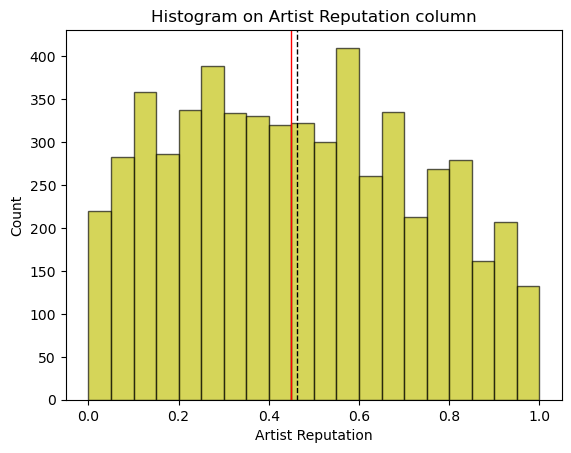

In [7]:
plt.hist(shipping_data["Artist Reputation"], bins=20, color='y', edgecolor='k', alpha=0.65)
plt.xlabel("Artist Reputation")
plt.ylabel("Count")
plt.title("Histogram on Artist Reputation column")

plt.axvline(shipping_data["Artist Reputation"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(shipping_data["Artist Reputation"].median(), color='r', linestyle='solid', linewidth=1)

- Data in the Artist Reputation column is pretty much normally distributed with mean and median almost equal to each other.
- So, imputation for this feature can be done with either median or mean.

#### Now, let's see the distributions of height and width as well.

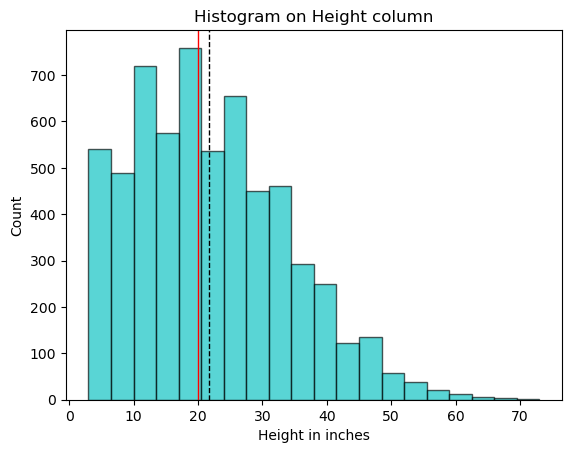

In [8]:
plt.hist(shipping_data["Height"], bins=20, color='c', edgecolor='k', alpha=0.65)
plt.xlabel("Height in inches")
plt.ylabel("Count")
plt.title("Histogram on Height column")
plt.axvline(shipping_data["Height"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(shipping_data["Height"].median(), color='r', linestyle='solid', linewidth=1)

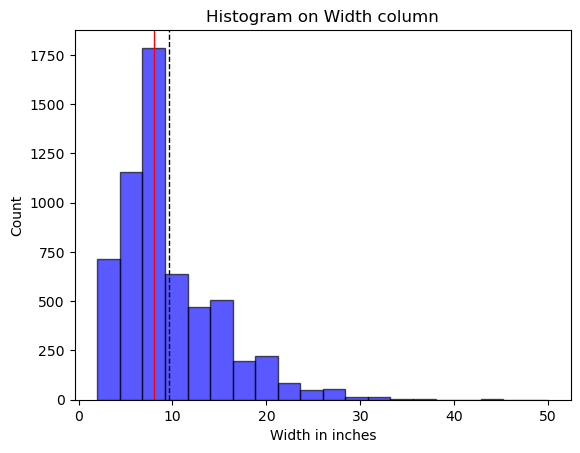

In [9]:
plt.hist(shipping_data["Width"], bins=20, color='b', edgecolor='k', alpha=0.65)
plt.xlabel("Width in inches")
plt.ylabel("Count")
plt.title("Histogram on Width column")
plt.axvline(shipping_data["Width"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(shipping_data["Width"].median(), color='r', linestyle='solid', linewidth=1)

- In both the cases of height and width, the data is right skewed. 
- In that case, median is a best choice to fill the null values.

#### Now, explore the distribution of weight column. 

In general, weight of any product depends on the material it is made of. Rathering filling the null values with the median/mean of the entire distribution, it would be ideal if they are replaced according to the respective material's measure. So it would be better to find out the distributions of weight column data for each material to decide which is best to fill the null values.

array([[<AxesSubplot:title={'center':'Aluminium'}>,
        <AxesSubplot:title={'center':'Brass'}>,
        <AxesSubplot:title={'center':'Bronze'}>],
       [<AxesSubplot:title={'center':'Clay'}>,
        <AxesSubplot:title={'center':'Marble'}>,
        <AxesSubplot:title={'center':'Stone'}>],
       [<AxesSubplot:title={'center':'Wood'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

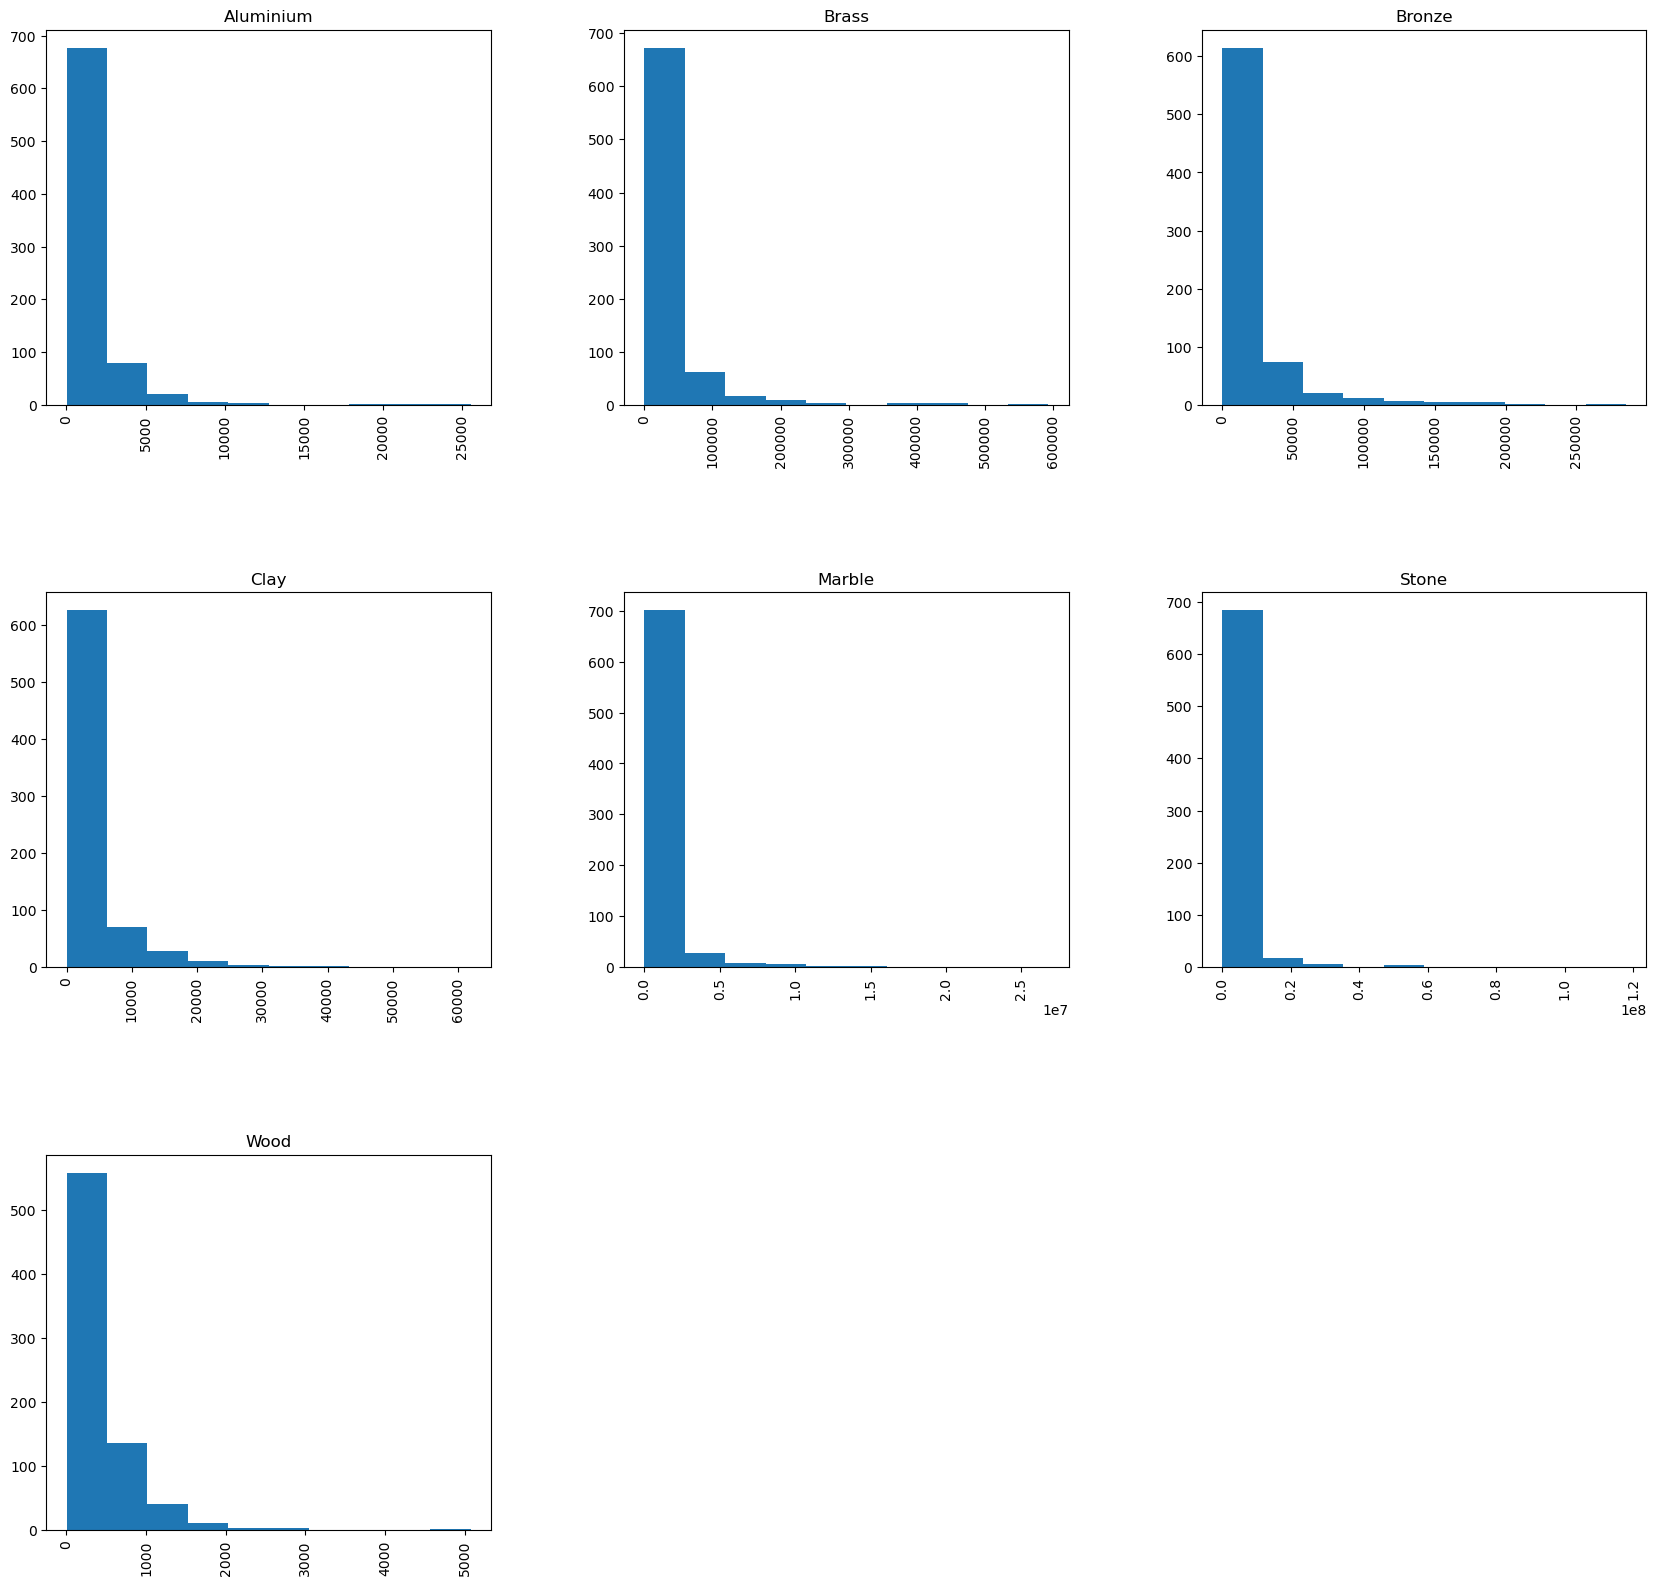

In [10]:
shipping_data['Weight'].hist(by=shipping_data['Material'], figsize = (20,20))

- Surprisingly, almost all the materials have skewed distributions of weights. So it would be better to use the median of weights for each material as imputation.


#### Now, let's inspect the material column distribution

In [11]:
pd.Series(shipping_data.Material.value_counts(), name = 'observation count for each material').to_frame()

,observation count for each material
Brass,847
Aluminium,845
Bronze,821
Marble,819
Clay,816
Wood,816
Stone,772


- Data in the material is likely unifromly distributed. Usually, in the case of qualitative data, mode is frequently used as an imputation. 
- But, in this scenario it would be not ideal to use the mode to replace the null values. So, better to update the null values as "Material_NA"

#### Now, let's explore the missing data in Transport column


In general, a specific means of transportation is preferred for every material shipment. Like fragile things are preferred to be transported through roadways than waterways.


So, let's explore what is the most preferential means of transport for every material. This can be achieved by grouping the data by material and then by transport and find the frequency.

In [12]:
grouped_Data = shipping_data.groupby(['Material', 'Transport'], as_index=False).count()[['Material', 'Transport', 'Customer Id']]
grouped_Data.columns = ['Material', 'Transport', 'Count']
grouped_Data

,Material,Transport,Count
0,Aluminium,Airways,247
1,Aluminium,Roadways,294
2,Aluminium,Waterways,175
3,Brass,Airways,218
4,Brass,Roadways,276
5,Brass,Waterways,177
6,Bronze,Airways,234
7,Bronze,Roadways,245
8,Bronze,Waterways,157
9,Clay,Airways,238


- From above, it is clearly evident that most used means of transportation for shipping any material is Roadways which can be used for Transport column's imputation.

#### Inspect 'Remote Location' attribute

Let's find out the whether more shipment orders are made by the customers who are residing in a remote location or not. Based on that the possible value for replacing the null values can be determined.

In [13]:
shipping_data["Remote Location"].value_counts()

No     4594
Yes    1135
Name: Remote Location, dtype: int64

- So "No" will be the imputation for Remote Location.

#### Inspect "Artist Reputation" attribute

Let's find out whether there are any multiple records for an artist.

In [14]:
# Group by Category and filter groups with more than one row
filtered_df = shipping_data.groupby('Artist Name').filter(lambda x: len(x) > 1)

# Reset index
filtered_df = filtered_df.reset_index(drop=True)

# Print the result

filtered_df["Artist Name"]

0         James Davis
1     Michael Johnson
2         Mary Martin
3      Elizabeth Ross
4        Joseph Jones
           ...       
92        James Smith
93    David Henderson
94      William Brown
95       Robert Davis
96      Charles Jones
Name: Artist Name, Length: 97, dtype: object

Now let's find any one of the arist having null as artist reputation in one of the entries.

In [15]:
shipping_data[shipping_data["Artist Name"] == "Robert Davis"][["Artist Name","Artist Reputation"]]

,Artist Name,Artist Reputation
2747,Robert Davis,0.63
3182,Robert Davis,NaN
6367,Robert Davis,0.14


For missing values in "Artist Reputation" column, the mean reputation value of the same artist can be replaced.

#### Any Incorrect data?

- Costs and Measurements must be positive. So let's check all the related columns.

In [16]:
len(shipping_data[shipping_data.Cost < 0])

659

In [17]:
len(shipping_data[shipping_data.Height < 0])

0

In [18]:
len(shipping_data[shipping_data.Weight < 0])

0

In [19]:
len(shipping_data[shipping_data.Width < 0])

0

In [20]:
len(shipping_data[shipping_data["Price Of Sculpture"] < 0])

0

In [21]:
len(shipping_data[shipping_data["Base Shipping Price"] < 0])

0

So, only Cost column has negative values which are incorrect. May be those are due to wrong entry which need to be corrected.

Before cleaning the data, let's have a look at the correlation and find the impact of features on the Cost column & also Base shipping Price.

In [22]:
shipping_data.corr()[["Cost","Base Shipping Price"]]

,Cost,Base Shipping Price
Artist Reputation,0.067368,-0.011820
Height,0.106047,0.353858
Width,0.158159,0.332361
Weight,0.417263,0.150856
Price Of Sculpture,0.476231,0.134407
Base Shipping Price,0.053068,1.000000
Cost,1.000000,0.053068


- It seems to be Weight and Price of the Sculpture are having a significant impact on the Cost of the shipment order.
- When it comes to the Base Shipping Price, Height and Width of the sculpture are having a considerable effect.

## Data Cleaning

In [23]:
shipping_data_copy = shipping_data.copy()

#### Correcting Artist Reputation Column

Replace the null values in Artist Reputation with the mean of reputation values of same artist from other rows.

In [24]:
def reputation(dataframe):
    for i in dataframe[dataframe['Artist Reputation'].isna()]['Artist Name'].tolist():
        if dataframe[dataframe['Artist Name']==i].loc[:, 'Artist Reputation'].values[0] > 0:
            #print("Artist imputed for", i)
            value_impute = np.mean(dataframe[dataframe['Artist Name']==i]['Artist Reputation'])
            dataframe.loc[dataframe['Artist Name'] == i, "Artist Reputation"] = value_impute   
    return dataframe

In [25]:
shipping_data_clean = reputation(shipping_data_copy)

In [26]:
shipping_data['Artist Reputation'].isna().sum() - shipping_data_clean['Artist Reputation'].isna().sum()

9

- Still there are 9 records with null values in Artist Reputation after replacing. These 9 values can be replaced with the median of Artist Reputation feature.

In [27]:
shipping_data_clean['Artist Reputation'] = shipping_data_clean['Artist Reputation'].\
                                        fillna(shipping_data_clean['Artist Reputation'].median())

In [28]:
shipping_data_clean['Artist Reputation'].isna().sum()

0

- Finally, all the null values in Artist Reputation column are eliminated.

#### Impute Height & Width Columns

Replace the null values in Height & Width columns with their respective median values.

In [29]:
shipping_data_clean['Height'] = shipping_data_clean['Height'].fillna(shipping_data_clean['Height'].\
                                                                     median())
shipping_data_clean['Width'] = shipping_data_clean['Width'].fillna(shipping_data_clean['Width'].\
                                                                   median())

#### Correct Categorical Variables - Remote Location, Transport & Material

In case of "Remote Location" & "Transport", the plan is to replace the null values with the mode of respective column, whereas in case of "Material", the missing values are labelled as "Material_NA"

In [30]:
mode_Remote_Location = shipping_data_clean["Remote Location"].mode().values[0]
mode_Transport = shipping_data_clean["Transport"].mode().values[0]

shipping_data_clean["Remote Location"] = shipping_data_clean["Remote Location"].fillna(mode_Remote_Location)
shipping_data_clean["Transport"] = shipping_data_clean["Transport"].fillna(mode_Transport)

In [31]:
shipping_data_clean["Material"] = shipping_data_clean["Material"].fillna("Material_NA")

#### Impute weight of each material using it's respective median

For this let's create a dictionary to store the median weight for each material

In [32]:
median_material = {}
for m in shipping_data_clean['Material'].unique().tolist():
    if  pd.isna(m) == False:
        median_weight = shipping_data_copy.groupby('Material').median()[['Weight']].loc[m].values[0]
        median_material[m] = median_weight
median_material

{'Brass': 8066.0,
 'Clay': 1374.0,
 'Aluminium': 664.0,
 'Wood': 251.0,
 'Marble': 115395.0,
 'Bronze': 5982.5,
 'Stone': 221082.0,
 'Material_NA': 3232.0}

In [33]:
shipping_data_clean['Weight'] = shipping_data_clean['Weight'].fillna(shipping_data_clean['Material'].\
                                                                     map(median_material))

In [34]:
shipping_data_clean.isnull().sum()

Customer Id              0
Artist Name              0
Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
Cost                     0
dtype: int64

- Hurrayy!!!... All null values are cleared.

#### Correct negative values in Cost Column

In [35]:
shipping_data_clean['Cost'] = shipping_data_clean['Cost'].abs()

#### Delete columns that are not affecting Cost variable

In [36]:
shipping_data_clean = shipping_data_clean.drop(['Customer Id', 'Artist Name'], axis=1)

## Outlier Detection

In [37]:
categoricals = list(shipping_data_clean.select_dtypes(['object']).columns)
categoricals

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Customer Location']

In [38]:
numericals = [x for x in shipping_data_clean.columns if x not in categoricals]
numericals

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Scheduled Date',
 'Delivery Date',
 'Cost']

In [39]:
numericals.remove('Scheduled Date')
numericals.remove('Delivery Date')

In [40]:
for each in numericals:
    print(each, np.abs(shipping_data_clean[each].skew()))

Artist Reputation 0.1666900982577487
Height 0.6368970586603213
Width 1.6832748044141834
Weight 22.580169148788222
Price Of Sculpture 22.20682307949474
Base Shipping Price 0.9181023776582664
Cost 29.86640618935751


- Cost, Price of Sculpture, Weight, Width columns have predominent outliers.

[Text(0.5, 1.0, 'Box Plot on Cost Column')]

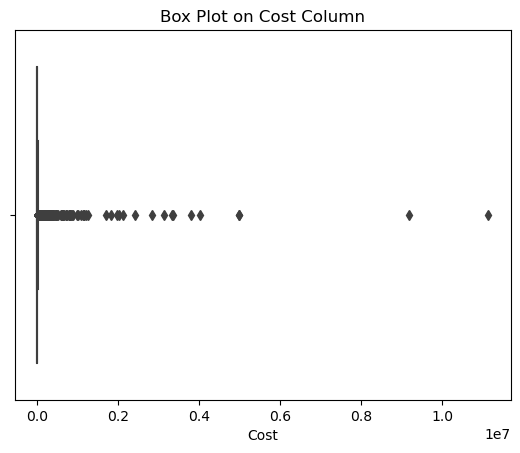

In [41]:
#b_plot = shipping_data_clean.boxplot(column = 'Cost')
#b_plot.plot()
sns.boxplot(x = shipping_data_clean['Cost']).set(title='Box Plot on Cost Column')

In [42]:
# identify heightest shipping cost as outliers
pd.Series(shipping_data_clean['Cost'].sort_values(ascending = False), name = 'Top shipping cost').to_frame().head()

,Top shipping cost
5164,11143428.25
4431,9177540.38
2772,4992890.84
4787,4976100.89
4560,4020731.90


In [43]:
# drop 5 highest cost outliers
drop_outlier = shipping_data_clean[shipping_data_clean['Cost'] > 4000000]
shipping_data_clean.drop(drop_outlier.index, inplace=True)

## Feature Engineering

Let's create new features for analysis

Dates attributes:

- Create new features by breaking down these dates to Year, Month, Date, Day of Week
- Create delta time period feature. This is define as the days difference between planned delivery and actual delivery date

In [44]:
# create new date features from scheduled date, for better visualizations
shipping_data_clean['scheduled_year'] = shipping_data_clean['Scheduled Date'].dt.year
shipping_data_clean['scheduled_month'] = shipping_data_clean['Scheduled Date'].dt.month
shipping_data_clean['scheduled_day'] = pd.DatetimeIndex(shipping_data_clean['Scheduled Date']).\
                                                                                            weekday
shipping_data_clean['scheduled_dateofmonth'] = shipping_data_clean['Scheduled Date'].dt.day

In [45]:
# create new date features from delivery date, for better visualizations
shipping_data_clean['delivery_year'] = shipping_data_clean['Delivery Date'].dt.year
shipping_data_clean['delivery_month'] = shipping_data_clean['Delivery Date'].dt.month
shipping_data_clean['delivery_day'] = pd.DatetimeIndex(shipping_data_clean['Delivery Date']).weekday
shipping_data_clean['delivery_dateofmonth'] = shipping_data_clean['Delivery Date'].dt.day

In [46]:
shipping_data_clean['delta'] = shipping_data_clean['Delivery Date'] - shipping_data_clean['Scheduled Date']

In [47]:
shipping_data_clean['delta'] = shipping_data_clean['delta'].astype(str).map(lambda x: x.split('days')[0])

# 5 examples
shipping_data_clean['delta'][:5]

0    -4 
1    -1 
2    -1 
3    -4 
4    -4 
Name: delta, dtype: object

### Address Attributes

For simplicity, extract state from the address. 

In [48]:
# print examples of customer address
shipping_data_clean['Customer Location'].unique()[:20]

array(['New Michelle, OH 50777', 'New Michaelport, WY 12072',
       'Bowmanshire, WA 19241', 'East Robyn, KY 86375',
       'Aprilside, PA 52793', 'Maddenberg, AL 43096',
       'South Matthew, WV 76033', 'Davidmouth, CA 37824',
       'Lisaville, ND 43925', 'Jacobland, WV 85997',
       'Brittanyside, GA 80351', 'Jacquelinemouth, WA 65740',
       'Reidshire, DC 83551', 'West Shannonside, WA 15898',
       'Kruegerchester, TX 85901', 'East Julia, CO 36716',
       'Jimenezfurt, WY 87107', 'APO AE 89114', 'North Sarah, OR 85972',
       'DPO AE 79107'], dtype=object)

In [49]:
# only keep the US state code
shipping_data_clean[['county', 'state1']] = shipping_data_clean['Customer Location'].\
                                                                        str.split(", ", expand=True,)
shipping_data_clean[['state', 'zip']] = shipping_data_clean['state1'].str.split(" ", expand=True,)

In [50]:
# drop redundant columns
shipping_data_clean = shipping_data_clean.drop(['Customer Location','county', 'state1', 'zip', \
                                                'Scheduled Date', 'Delivery Date'], axis=1)

In [51]:
# check state column
shipping_data_clean['state'].unique()

array(['OH', 'WY', 'WA', 'KY', 'PA', 'AL', 'WV', 'CA', 'ND', 'GA', 'DC',
       'TX', 'CO', None, 'OR', 'MI', 'NM', 'AR', 'VT', 'IA', 'MN', 'NH',
       'SC', 'OK', 'HI', 'RI', 'LA', 'DE', 'ID', 'CT', 'MS', 'FL', 'VA',
       'MA', 'KS', 'ME', 'NC', 'NV', 'MD', 'SD', 'WI', 'MT', 'IL', 'AZ',
       'AK', 'NY', 'NJ', 'TN', 'NE', 'MO', 'IN', 'UT'], dtype=object)

In [52]:
shipping_data_clean.to_csv("Cleaned_Shipping_Details.csv")